# <u>Simple functions and Lebesgue integration </u>

The Lebesgue integral is a generalization of the usual Riemann integral to a larger class of functions. There are a number of good reasons to generalize the Riemann integral to something better -
* Some functions are pathological and are not Riemann integrable, but we would still like to talk about the 'size' or 'area' of them. We need more mathematical machinery to talk about the integrals of functions that are not necessarily Riemann integrable.
* Some nice analytical properties - techniques such as swapping limits or infinite sums and the integral operator usually requires some strong conditions on the nature of the function, the domain of integral, and properties of the sum/limit. The Lebesgue integral gives us an exact idea of what conditions are needed to apply these techniques.
* Its quite easy to generalize the Lebesgue integral to abstract measure spaces, such as discrete measure, probability measure, etc.

The Lebesgue integral is defined using the idea of simple functions, so lets dive into studying what are simple functions and what the Lebesgue integral is all about!

# <u> The characteristic function  </u>

Let $(X, \mathcal{M}, \mu)$ be a measure space and let $E \subset X$. The characteristic function (sometimes also called the indicator function) associated with the set $E$, denoted $\mathcal{X}_E$, is defined as :

$$\mathcal{X}_E(x) = \left\{
  \begin{array}{11}
   1, & \text{if } x \in E\\
   0, & \text{if } x \in E^c
  \end{array} \right. $$

That is, the characteristic function outputs 1 if the point is in our set, and 0 if its not in our set. $\mathcal{X}_E$ is a measurable function if and only if $E$ is a measurable set, i.e, $E \in \mathcal{M}$.

# <u>Simple functions</u>

A function $s : X \to \mathbb{R}$ is said to be a simple function if its range contains only a finite number of values. Equivalently, a function is simple if it can be written as a finite linear combination of characteristic functions.

$$s(x) = \sum_{i=1}^n \alpha_i \mathcal{X}_{A_i}, \text{ where } A_i = \{x : s(x) = \alpha_i\} \text{ } \forall \text{ } i = 1, 2, \cdots, n$$

If $s(x) \geq 0$ for all $x$, then $s(.)$ is said to be a non-negative simple function. It is evident that $s(.)$ in the above representation is non-negative if and only if all the coefficients $\alpha_i$ are non-negative.

# <u>Integral of a simple function</u>

A function $f(.)$ is said to be measurable if the inverse image of any open set is a measurable set. It is evident that a characteristic function $\mathcal{X}_E$ is a measurable function if and only if the set $E$ is a measurable set. A simple function $s(.)$ is measurable if and only if all the $A_i$ in our above representation are measurable.

Let $F \in \mathcal{M}$ be a measurable set. The Lebesgue integral of a non-negative simple measurable function $s(.)$ over $F$, with respect to the measure $\mu$ is defined as :
$$\int_F s d \mu = \sum_{i=1}^n \alpha_i \mu(F \cap A_i)$$

In order to talk about $\mu(F \cap A_i)$, the set $F \cap A_i$ needs to be measurable. This is why we require $F$ to be a measurable set, and $s(.)$ to be a measurable function.

# <u>Integral of a general non-negative function</u>
Let $f(.)$ be a non-negative measurable function, and let $F \in \mathcal{M}$. The Lebesgue integral of $f(.)$ over $F$ is defined as the supremum of the Lebesgue integral of all possible non-negative simple functions that are bounded by $f(.)$. That is,
$$\int_F f d\mu = \sup _{0 \leq s \leq f} \int_F sd\mu$$

# <u>Approximating general non-negative functions by simple functions </u>

The definition of Lebesgue integral for a general function requires us to compute the supremum of a set. The search space for our supremum is quite large, since we can construct many many simple functions which are bounded by $f(.)$. This makes the computation of supremum difficult in general, so we need a somewhat easier way to compute the Lebesgue integrals.

A couple of key results help us in doing so - we can approximate any non-negative function to arbitrary degree of accuracy by simple functions, and the Lebesgue Monotone Convergence Theorem.

**Theorem :** Let $(X, \mathcal{M}, \mu)$ be a measure space, and let $f : X \to \mathbb{R}$ be a non-negative measurable function. Then there exists a sequence of non-negative simple measurable functions $\{s_n\}$, such that :
* $\{s_n\}$ is monotonically increasing - $0 \leq s_n(x) \leq s_{n+1}(x) \leq f(x) \text{ } \forall \text{ } x \in X, n \in \mathbb{N}$
* $s_n$ converges to $f$ pointwise.

**Proof sketch:** We can in fact explicitly construct a sequence of simple functions with the above desired properties.

Let $n \in \mathbb{N}$. For $i = 1, 2, \cdots, n\cdot 2^n$ define the set $E_{n, i}$ as $f^{-1}\left(\left[\frac{i-1}{2^n}, \frac{i}{2^n}\right)\right)$, and define the set $F_n = f^{-1}([n, \infty))$. Define the function -
$$s_n(x) = \sum_{i=1}^{n\cdot 2^n} \left(\frac{i-1}{2^n}\right)\cdot \mathcal{X}_{E_{n,i}} + n\cdot \mathcal{X}_{F_n}$$

(here $\mathcal{X}_S$ refers to the characteristic function associated with the set $S$). As $f(.)$ is a measurable function, $E_{n, i}$ and $F_n$ are measurable sets, so the characteristic function associated with these sets are measurable. As $s_n(.)$ is a finite, non-negative linear combination of measurable characteristic functions, $s_n$ is a non-negative measurable simple function for all $n \in \mathbb{N}$. Monotonicity of $s_n$ and pointwise convergence of $s_n$ to $f$ can be proven using the defintion of $s_n$.

## <u>An alternate formulation for the Lebesgue integral of general functions</u>

Once we construct a sequence of simple functions as above, the Lesbesgue Monotone Convergence Theorem gives us :
$$\int_F fd\mu = \lim_{n \to \infty} \int_F s_n d\mu$$

Constructing a sequence of simple functions that convergence pointwise to $f$ is a powerful technique that is used often in proving results in measure theory - we often start simple and prove results first for characteristic functions and simple functions. Generalizing it to the class of non-negative functions often uses the fact that we can construct a sequence of simple functions which approximate our given function to arbitrary degree of accuracy.

In this document, we see this convergence result in action. We take a few example functions and approximate them by simple functions and overlay them in an animation.

In [1]:
num_iterations = 7 # the number of iterations of simple functions
num_points = 2000 # the number of points we uniformly partition the domain into

In [2]:
# importing libraries
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import animation

In [3]:
# program for generating simple functions
def simple_function_approx(num_iterations, function): # function is a list which stores the values of our given function at each point

  simple_functions = [] # this list stores the sequence of simple functions
  for k in range(1, num_iterations+1):

    k_th_simple_function = [0 for x in range(num_points)] # this list stores the current iteration of simple function

    for j in range(num_points):
      for i in range(1, (k * (2**k))+1):

        # we need to evaluate the function value and see which bin it falls into
        if (function[j] >= (i-1)/(2**k)) and (function[j] < i/(2**k)):
          k_th_simple_function[j] = (i-1)/(2**k)

        elif (function[j] >= k):
          k_th_simple_function[j] = k

    simple_functions.append(k_th_simple_function) # once the current iteration of simple function is evaluated, append it to the sequence of simple functions
  return simple_functions

In [4]:
# function to update the graph of our simple function iteratively. this helps in animation
def drawframe(n, ax, x_data, y_data_1, y_data_2, line1, line2, line3, txt_title):
  line1.set_data(x_data, y_data_1)
  line2.set_data(x_data, y_data_1)
  line3.set_data(x_data, y_data_2[n % num_iterations])
  txt_title.set_text("Iteration: %d" % ((n % num_iterations) + 1))

  if hasattr(ax, "_fill_patch"):
    ax._fill_patch.remove()  # Remove old shading
  ax._fill_patch = ax.fill_between(x_data, y_data_2[n % num_iterations], alpha=0.3, color='blue')  # Store new shading

  return (line1, line2, line3)


# <u>Example 1 - a quadratic function</u>

In this example, we take the quadratic function $y = 6x - x^2$ in the range $x \in [0, 6]$ and compute the first few iterations of simple function approximations of it.

In [5]:
def quadratic(x):
  return (x * (6 - x))

x_axis_1 = np.linspace(0, 6, num_points)

function_1 = [quadratic(x) for x in x_axis_1]

simple_function_1 = simple_function_approx(num_iterations, function_1)


In [6]:
fig1 = plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.set_xlim((0, 6))
ax1.set_ylim(0, 10)
ax1.set_xlabel("x-axis")
ax1.set_ylabel("y-axis")
ax1.set_title("Quadratic function")

ax2.set_xlim((0, 6))
ax2.set_ylim(0, 10)
ax2.set_xlabel("x-axis")
ax2.set_ylabel("y-axis")

txt_title = ax2.set_title('')
line1, = ax1.plot([], [], 'b', lw=2)
line2, = ax2.plot([], [], 'r', lw=2)
line3, = ax2.plot([], [], 'g', lw=2)

ax2.legend(['Function', 'Simple function']);

fill = ax2.fill_between([], [], color='blue', alpha=0.3)

anim = animation.FuncAnimation(fig1, drawframe, frames=30, interval=1500, blit=True, fargs = (ax2, x_axis_1, function_1, simple_function_1, line1, line2, line3, txt_title))
plt.close(fig1)
HTML(anim.to_html5_video())


# <u>Example 2 : a trigonometric function</u>

In this example, we take the function $y = 4 \cdot (1 + sin(5x))$ in the range $x \in [0, 4]$ and compute its simple function approximations.

In [7]:
def trig_function(x):
  return 4 * (1 + np.sin(5*x))

x_axis_2 = np.linspace(0, 4, num_points)

function_2 = [trig_function(x) for x in x_axis_2]

simple_function_2 = simple_function_approx(num_iterations, function_2)

In [8]:
fig2 = plt.figure(figsize=(12,5))
ax3 = plt.subplot(1,2,1)
ax4 = plt.subplot(1,2,2)

ax3.set_xlim((0, 4))
ax3.set_ylim((0, 8))
ax3.set_xlabel("x-axis")
ax3.set_ylabel("y-axis")
ax3.set_title("Sinusoidal function")

ax4.set_xlim((0, 4))
ax4.set_ylim(0, 8)
ax4.set_xlabel("x-axis")
ax4.set_ylabel("y-axis")

txt_title_2 = ax4.set_title('')
line4, = ax3.plot([], [], 'b', lw=2)
line5, = ax4.plot([], [], 'r', lw=2)
line6, = ax4.plot([], [], 'g', lw=2)

ax4.legend(['Function', 'Simple function']);
fill = ax4.fill_between([], [], color='blue', alpha=0.3)

anim = animation.FuncAnimation(fig2, drawframe, frames=30, interval=1500, blit=True, fargs = (ax4, x_axis_2, function_2, simple_function_2, line4, line5, line6, txt_title_2))
plt.close(fig2)
HTML(anim.to_html5_video())


# <u>Example 3 : a discontinuous function</u>

The only assumptions we made about $f(.)$ are that it is non-negative and measurable! Other than that, it need not have any properties such as smoothness or even continuity! This example demonstrates this fact using a piecewise function defined by
$$y = \left\{
  \begin{array}{11}
    x^2, & \text{if } x \in [0, 2)\\
    4 - x, & \text{if } x \in [2, 4)\\
    x/2, & \text{otherwise}
  \end{array} \right. $$

In [9]:
def discontinuous_function(x):
  if (x >= 0) and (x < 2):
    return x*x
  elif (x >= 2) and (x < 4):
    return 4 - x
  else:
    return x/2

x_axis_3 = np.linspace(0, 8, num_points)

function_3 = [discontinuous_function(x) for x in x_axis_3]

simple_function_3 = simple_function_approx(num_iterations, function_3)

In [22]:
fig3 = plt.figure(figsize=(12,5))
ax5 = plt.subplot(1,2,1)
ax6 = plt.subplot(1,2,2)

ax5.set_xlim((0, 8))
ax5.set_ylim((0, 6))
ax5.set_xlabel("x-axis")
ax5.set_ylabel("y-axis")
ax5.set_title("A discontinuous function")

ax6.set_xlim((0, 8))
ax6.set_ylim(0, 6)
ax6.set_xlabel("x-axis")
ax6.set_ylabel("y-axis")

txt_title_3 = ax6.set_title('')
line7, = ax5.plot([], [], 'b', lw=2)
line8, = ax6.plot([], [], 'r', lw=2)
line9, = ax6.plot([], [], 'g', lw=2)

ax6.legend(['Function', 'Simple function']);
fill = ax6.fill_between([], [], color='blue', alpha=0.3)

anim = animation.FuncAnimation(fig3, drawframe, frames=30, interval=1500, blit=True, fargs = (ax6, x_axis_3, function_3, simple_function_3, line7, line8, line9, txt_title_3))
plt.close(fig3)
HTML(anim.to_html5_video())



# <u>Example 4 : function that is continuous everywhere but differentiable nowhere</u>

Weierstrass function is a classic example of a function that is continuous everywhere but differentiable nowhere. It is given by the infinite series :
$$f(x) = \sum_{n = 0}^{\infty} a^n cos(b^n \pi x)$$
where $0 < a < 1$ and $b$ is a positive odd integer with $ab > 1 + \frac{3\pi}{2}$. The Weierstrass function is also a famous example of a fractal curve - the function exhibits self-similarity and preserves its complicated structure no matter how well we zoom in!

Of course, its impossible to evaluate an infinite sum in a program, since there is only a finite amount of memory in a computer. What we can do instead, is approximate the series by a "good enough" partial sum - as $0 < a < 1$, the terms go to zero rapidly, so we can approximate the infinite series by its partial sums with considerable accuracy.

I have taken $a = 0.5$, $b = 13$ and have approximated the series by the sum of its first 20 terms here. I have also translated the Weierstrass function up by 1 unit, to ensure that it is always non-negative.

In [35]:
def Weierstrass(x):
  s = 0
  for n in range(0, 20):
    s += (0.5**n)*np.cos((13**n)*np.pi*x)
  return (s+1)

x_axis_4 = np.linspace(0, 0.4, num_points)

function_4 = [Weierstrass(x) for x in x_axis_4]

simple_function_4 = simple_function_approx(num_iterations, function_4)

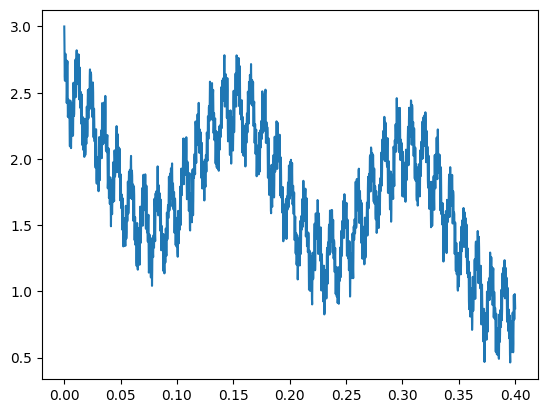

In [36]:
plt.plot(x_axis_4, function_4, label = 'Function')
plt.show()

In [37]:
fig4 = plt.figure(figsize=(12,5))
ax7 = plt.subplot(1,2,1)
ax8 = plt.subplot(1,2,2)

ax7.set_xlim((0, 0.4))
ax7.set_ylim((0, 4))
ax7.set_xlabel("x-axis")
ax7.set_ylabel("y-axis")
ax7.set_title("A Weierstrass function")

ax8.set_xlim((0, 0.4))
ax8.set_ylim(0, 4)
ax8.set_xlabel("x-axis")
ax8.set_ylabel("y-axis")

txt_title_4 = ax8.set_title('')
line10, = ax7.plot([], [], 'b', lw=2)
line11, = ax8.plot([], [], 'r', lw=2)
line12, = ax8.plot([], [], 'g', lw=2)

ax8.legend(['Function', 'Simple function']);
fill = ax8.fill_between([], [], color='blue', alpha=0.3)

anim = animation.FuncAnimation(fig4, drawframe, frames=30, interval=1500, blit=True, fargs = (ax8, x_axis_4, function_4, simple_function_4, line10, line11, line12, txt_title_4))
plt.close(fig4)
HTML(anim.to_html5_video())

# <u>Some observations and conclusions</u>
We see that the simple functions get better in approximation very quickly. This shouldn't be a surprise though, since the simple functions parition the interval $[0, n)$ into $n\cdot 2^n$ intervals! Thus, the intervals are refined at an exponential rate with each iteration, and this is why we see good approximations even for a small number of iterations.

As we can see from our third example, the iterative approximation also converges for discontinuous functions. This reinforces the fact that we require $f(.)$ to only be non-negative and measurable and nothing more.